# Imports

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt

# Preprocess data

1. Read "BF_cells_on_grid.txt" (Brighfield features) and "SSC.txt" (Darkfield features) as pandas Dataframe
2. Based on the folders of each image determine the ground truth label for each image (feature vector)
    + Use only 5 different classes. G1/G2/S as class 0, Prophase as class 1, Metaphase as class 2, Anaphase as class 3 and Telophase as class 4
3. Only some of the columns are useful for classification. Only keep the useful ones.
4. Concat brightfield and darkfield features and append the ground truth as the last column.
5. After merging, delete all rows that contain any "nan" value.
6. To make sure that you didn't make any mistake, check that the final dataframe must have 1007 rows and 214 columns. 

In [2]:
brf_exclude_cols = [0,1,3,4,7,17,19] + list(range(70,77))       # Exclude these columns from brightfield features
daf_exclude_cols = list(range(0,50)) + list(range(70,77))       # Exclude these columns from darkfield features

In [3]:
bright_field_df = pd.read_csv('BF_cells_on_grid.txt', sep='\t')
dark_field_df = pd.read_csv('SSC.txt', sep='\t')
dark_field_df

,ImageNumber,ObjectNumber,AreaShape_Area,AreaShape_Center_X,AreaShape_Center_Y,AreaShape_Compactness,AreaShape_Eccentricity,AreaShape_EulerNumber,AreaShape_Extent,AreaShape_FormFactor,...,Texture_SumEntropy_DF_image_3_45,Texture_SumEntropy_DF_image_3_90,Texture_SumVariance_DF_image_3_0,Texture_SumVariance_DF_image_3_135,Texture_SumVariance_DF_image_3_45,Texture_SumVariance_DF_image_3_90,Texture_Variance_DF_image_3_0,Texture_Variance_DF_image_3_135,Texture_Variance_DF_image_3_45,Texture_Variance_DF_image_3_90
0,1,1,3025,0.0,0.0,1.046851,0.0,1.0,1.0,0.785398,...,1.217754,1.169436,1.518843,1.487859,1.447918,1.504291,0.494892,0.517546,0.509481,0.500178
1,1,2,3025,7.0,82.0,1.046851,0.0,1.0,1.0,0.785398,...,1.147755,1.098135,1.364728,1.373875,1.293993,1.405396,0.435499,0.457470,0.447485,0.442606
2,1,3,3025,0.0,137.0,1.046851,0.0,1.0,1.0,0.785398,...,0.433281,0.401624,0.589429,0.534232,0.556421,0.550968,0.222882,0.235259,0.235259,0.222882
3,1,4,3025,7.0,192.0,1.046851,0.0,1.0,1.0,0.785398,...,1.104591,1.081380,0.962043,0.954771,0.950333,1.022438,0.346567,0.343440,0.353550,0.341532
4,1,5,3025,0.0,247.0,1.046851,0.0,1.0,1.0,0.785398,...,1.151706,1.106571,1.244303,1.234650,1.224694,1.324869,0.420889,0.430030,0.430871,0.421233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1570,7,221,3025,797.0,577.0,1.046851,0.0,1.0,1.0,0.785398,...,2.095728,1.820277,6.548447,6.548447,6.548447,15.690579,3.775148,3.980399,3.775148,3.922645
1571,7,222,3025,809.0,632.0,1.046851,0.0,1.0,1.0,0.785398,...,2.095728,1.820277,6.548447,6.548447,6.548447,15.690579,3.775148,3.980399,3.775148,3.922645
1572,7,223,3025,797.0,687.0,1.046851,0.0,1.0,1.0,0.785398,...,2.095728,1.820277,6.548447,6.548447,6.548447,15.690579,3.775148,3.980399,3.775148,3.922645
1573,7,224,3025,809.0,742.0,1.046851,0.0,1.0,1.0,0.785398,...,2.095728,1.820277,6.548447,6.548447,6.548447,15.690579,3.775148,3.980399,3.775148,3.922645


In [4]:
bright_field_df

,ImageNumber,ObjectNumber,AreaShape_Area,AreaShape_Center_X,AreaShape_Center_Y,AreaShape_Compactness,AreaShape_Eccentricity,AreaShape_EulerNumber,AreaShape_Extent,AreaShape_FormFactor,...,Texture_SumEntropy_BF_image_3_45,Texture_SumEntropy_BF_image_3_90,Texture_SumVariance_BF_image_3_0,Texture_SumVariance_BF_image_3_135,Texture_SumVariance_BF_image_3_45,Texture_SumVariance_BF_image_3_90,Texture_Variance_BF_image_3_0,Texture_Variance_BF_image_3_135,Texture_Variance_BF_image_3_45,Texture_Variance_BF_image_3_90
0,1,1,1010.0,27.0,28.0,1.001900,0.330036,1.0,0.779923,0.908194,...,2.459747,2.433962,12.828302,10.325637,10.625090,12.475862,3.974580,4.396099,4.041580,4.233855
1,1,2,804.0,28.0,83.0,1.007350,0.458638,1.0,0.788235,0.913862,...,2.223596,2.272710,5.802321,5.949761,5.352879,6.156116,2.364797,2.702687,2.380534,2.615533
2,1,3,984.0,28.0,138.0,1.007290,0.455349,1.0,0.805897,0.901052,...,2.323087,2.344792,8.530133,7.505874,7.334750,9.485162,2.978152,3.348941,3.008158,3.183019
3,1,4,876.0,28.0,189.0,1.041543,0.640612,1.0,0.816403,0.872600,...,2.012220,2.047715,4.178314,3.783592,3.740829,4.735829,1.687898,1.871203,1.705234,1.784822
4,1,5,961.0,28.0,245.0,1.022877,0.575755,1.0,0.790296,0.897867,...,2.169390,2.199687,6.235185,5.397779,5.367699,6.827238,2.123684,2.362039,2.138517,2.255364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1570,7,221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1571,7,222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1572,7,223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1573,7,224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
classes = {2:0, 3:0, 6:0, 5:1, 4:2, 1:3, 7:4}
image_num = bright_field_df.copy()
bright_field_df.drop(bright_field_df.columns[brf_exclude_cols], axis=1, inplace=True)
dark_field_df.drop(dark_field_df.columns[daf_exclude_cols], axis=1, inplace=True)
dark_field_df['target'] = image_num['ImageNumber'].apply(lambda x: classes[x])

In [6]:
df = pd.concat([bright_field_df, dark_field_df], axis=1)
df = df.dropna()
df

,AreaShape_Area,AreaShape_Compactness,AreaShape_Eccentricity,AreaShape_Extent,AreaShape_FormFactor,AreaShape_MajorAxisLength,AreaShape_MaxFeretDiameter,AreaShape_MaximumRadius,AreaShape_MeanRadius,AreaShape_MedianRadius,...,Texture_SumEntropy_DF_image_3_90,Texture_SumVariance_DF_image_3_0,Texture_SumVariance_DF_image_3_135,Texture_SumVariance_DF_image_3_45,Texture_SumVariance_DF_image_3_90,Texture_Variance_DF_image_3_0,Texture_Variance_DF_image_3_135,Texture_Variance_DF_image_3_45,Texture_Variance_DF_image_3_90,target
0,1010.0,1.001900,0.330036,0.779923,0.908194,36.919147,36.619667,17.464249,6.229814,5.385165,...,1.169436,1.518843,1.487859,1.447918,1.504291,0.494892,0.517546,0.509481,0.500178,3
1,804.0,1.007350,0.458638,0.788235,0.913862,33.962602,33.541020,14.866069,5.577167,5.000000,...,1.098135,1.364728,1.373875,1.293993,1.405396,0.435499,0.457470,0.447485,0.442606,3
2,984.0,1.007290,0.455349,0.805897,0.901052,37.529262,36.878178,16.492423,6.128257,5.385165,...,0.401624,0.589429,0.534232,0.556421,0.550968,0.222882,0.235259,0.235259,0.222882,3
3,876.0,1.041543,0.640612,0.816403,0.872600,38.240976,36.674242,13.928388,5.562476,5.000000,...,1.081380,0.962043,0.954771,0.950333,1.022438,0.346567,0.343440,0.353550,0.341532,3
4,961.0,1.022877,0.575755,0.790296,0.897867,38.739512,37.696154,15.132746,5.954914,5.099020,...,1.106571,1.244303,1.234650,1.224694,1.324869,0.420889,0.430030,0.430871,0.421233,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1372,809.0,1.159894,0.798860,0.758912,0.748272,41.895326,40.112342,12.806248,4.868445,4.472136,...,1.292685,3.835483,3.745820,3.765791,3.847212,1.099507,1.094425,1.106793,1.098951,4
1373,1081.0,1.180564,0.810556,0.783333,0.744878,49.180647,45.891176,13.601471,5.469943,5.000000,...,1.082307,1.446051,1.384635,1.376499,1.421346,0.469903,0.486663,0.482963,0.472851,4
1374,907.0,1.087079,0.730914,0.809821,0.838915,41.393351,39.623226,13.152946,5.434556,5.000000,...,0.992579,1.300199,1.244581,1.186889,1.223920,0.374985,0.383431,0.382562,0.376525,4
1375,1070.0,1.219339,0.831609,0.813070,0.734663,50.377552,46.529560,13.152946,5.345136,5.000000,...,1.079783,1.495449,1.401113,1.424782,1.417989,0.469779,0.487347,0.482995,0.473204,4


# Fit a classifier

1. Split the dataset into train/test.
2. Fit a classifier on the train data.
    + No need to implement any complex classifier. You can use the available classifiers in sklearn such as decision trees.
3. Evaluate the model on the test set.
4. Report accuracy and plot the confusion matrix.

In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

In [112]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(train.drop(['target'], axis=1), train.target)

RandomForestClassifier(max_depth=10, random_state=42)

In [113]:
from sklearn.metrics import accuracy_score
predicted = rf.predict(test.drop(['target'], axis=1))
accuracy = accuracy_score(test.target, predicted)
print(f'accuracy score: {accuracy:.3}')

accuracy score: 0.847


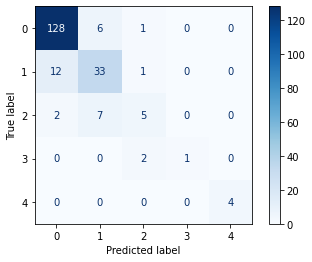

In [114]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


color = 'white'
matrix = ConfusionMatrixDisplay.from_estimator(rf, test.drop(['target'], axis=1), test.target, cmap=plt.cm.Blues)